### kmeans++ 簇中心初始化原理图

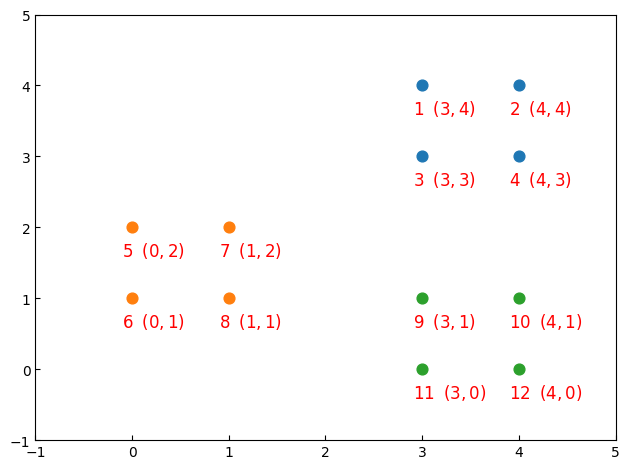

$D(x)^2$:  [8, 13, 5, 10, 1, 2, 0, 1, 5, 10, 8, 13]
被选簇中心样本编号： 1
当前簇中心: [[1 2]
 [4 4]]
$D(x)^2$:  [1, 0, 2, 1, 1, 2, 0, 1, 5, 9, 8, 13]
被选簇中心样本编号： 11
当前簇中心: [[1 2]
 [4 4]
 [4 0]]


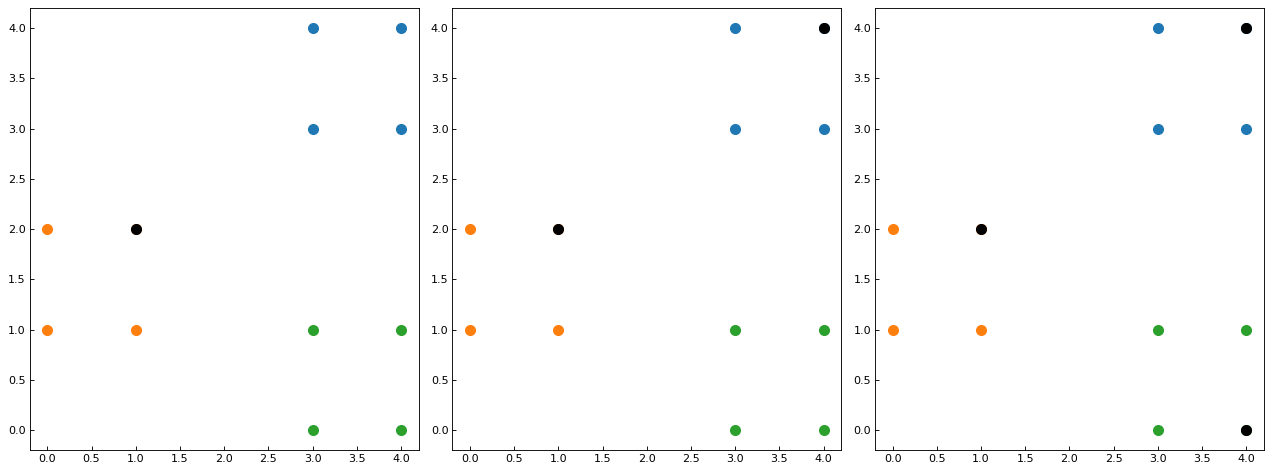

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def make_data():
    x = np.array([[3, 4], [4, 4], [3, 3], [4, 3],
                  [0, 2], [0, 1], [1, 2], [1, 1],
                  [3, 1], [4, 1], [3, 0], [4, 0]])
    idx = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2])
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    for i in range(len(np.unique(idx))):
        index = (i == idx)
        data = x[index]
        plt.scatter(data[:, 0], data[:, 1], s=60)  # 绘制所有样本点
    for i in range(x.shape[0]):  # 绘制文本
        plt.annotate(r"${}\;\;({},{})$".format(i + 1, x[i, 0], x[i, 1]),
                     xy=(x[i, 0] - 0.1, x[i, 1] - 0.4), fontsize=12, c='r')
    plt.xlim(-1, 5)
    plt.ylim(-1, 5)
    plt.tight_layout()
    plt.show()
    return x, idx


def InitialCentroid(x, K, idx=None):
    c0_idx = 6
    centroid = x[c0_idx].reshape(1, -1)  # 选择第一个簇中心
    k = 1
    n = x.shape[0]
    plt.figure(figsize=(16, 6), dpi=80)
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.subplot(1, K, k)
    for i in range(K):  # 绘制所有样本点
        index = (i == idx)
        data = x[index]
        plt.scatter(data[:, 0], data[:, 1], s=80)
    plt.scatter(centroid[:, 0], centroid[:, 1], c='black', s=80)

    while k < K:  # 依次得到K个簇
        d2 = []
        for i in range(n):
            subs = centroid - x[i, :]
            dimension2 = np.power(subs, 2)
            dimension_s = np.sum(dimension2, axis=1)  # sum of each row
            d2.append(np.min(dimension_s))
        print(r"$D(x)^2$: ", d2)
        new_c_idx = np.argmax(d2)
        print("被选簇中心样本编号：", new_c_idx)
        centroid = np.vstack([centroid, x[new_c_idx]])  # 加入新的簇中心
        plt.subplot(1, K, k + 1)
        for i in range(K):  # 绘制所有样本点
            index = (i == idx)
            data = x[index]
            plt.scatter(data[:, 0], data[:, 1], s=80)
        plt.scatter(centroid[:, 0], centroid[:, 1], c='black', s=80)  # 可视化簇中心
        k += 1
        print("当前簇中心:", centroid)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    x, idx = make_data()
    InitialCentroid(x, 3, idx)
